This is a notebook for putting all of the project into one place. 
This is where we should be testing and training our models as well as putting
together the final result. 

In [5]:
#Import all necessary packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

#import tflite_support as ts
#from tflite_support import task
#from tflite_support.task import core
#from tflite_support.task import processor
#from tensorflow.python.keras import layers
#from tensorflow.python.keras.layers import Dense, Flatten
#from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam

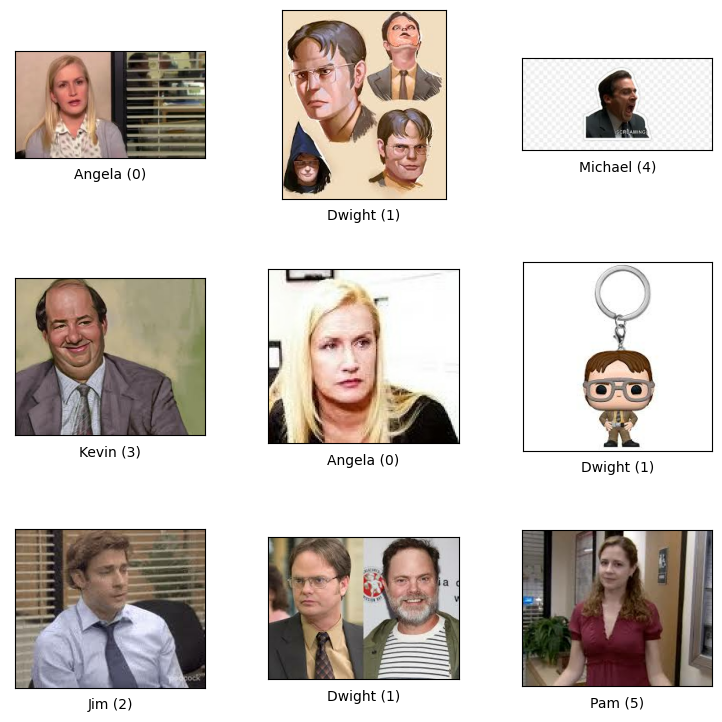

In [6]:
#Import the data for character classification
import preprocessing
from preprocessing import get_characters

#Set file path as your directory to the folder containing Office Image dataset, and show examples
file_path = '../data/characters/'
#X0, Y0, X1, Y1, D0, D1= get_characters(file_path)
train_ds, validate_ds, test_ds = get_characters(file_path)


#from keras.applications.res_net50 import preprocess_input


In [7]:
print("The shape of our training images is ", np.shape(train_ds))#), " with label shape ", np.shape(Y0))
print("The shape of our testing images is ", np.shape(test_ds))#, " with label shape ", np.shape(Y1))

The shape of our training images is  ()
The shape of our testing images is  ()


In [8]:
import recognition
from recognition import get_resnet

#Get Pretrained Resnet Model with a few extra layers for additional training
#This is pretrained on ImageNet

resnet_model = get_resnet()

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

In [ ]:
#Train the new model with our data
#resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) 
resnet_model.compile(
        loss="sparse_categorical_crossentropy",  ## do not change loss/metrics
        metrics=["categorical_accuracy"],
        optimizer= keras.optimizers.Adam(learning_rate = 0.001),  ## feel free to change

    )

#View the layers of the pretrained model (View trainable versus non-trainable)
resnet_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 624)               1278576   
                                                                 
 dense_5 (Dense)             (None, 6)                 3750

In [ ]:
#Fit the model to our data

#history = resnet_model.fit(D0, epochs=10) #Add back in validation data between D0 and epochs: validation_data=val_ds and batch size
#Making validation data

history = resnet_model.fit(
    train_ds,
    epochs          = 10,
    batch_size      = 400,
    validation_data = validate_ds,
)

Epoch 1/10
34/34 [==============================] - 14s 410ms/step - loss: 1.4423 - categorical_accuracy: 0.2034 - val_loss: 1.7969 - val_categorical_accuracy: 0.3000
Epoch 2/10
34/34 [==============================] - 14s 415ms/step - loss: 1.4311 - categorical_accuracy: 0.1959 - val_loss: 1.8467 - val_categorical_accuracy: 0.1733
Epoch 3/10
34/34 [==============================] - 14s 403ms/step - loss: 1.4319 - categorical_accuracy: 0.1817 - val_loss: 1.8294 - val_categorical_accuracy: 0.3333
Epoch 4/10
34/34 [==============================] - 14s 413ms/step - loss: 1.3801 - categorical_accuracy: 0.1770 - val_loss: 1.9016 - val_categorical_accuracy: 0.2133
Epoch 5/10
34/34 [==============================] - 14s 405ms/step - loss: 1.3939 - categorical_accuracy: 0.1742 - val_loss: 1.9447 - val_categorical_accuracy: 0.4400
Epoch 6/10
34/34 [==============================] - 14s 414ms/step - loss: 1.3915 - categorical_accuracy: 0.1742 - val_loss: 1.8865 - val_categorical_accuracy: 0.420

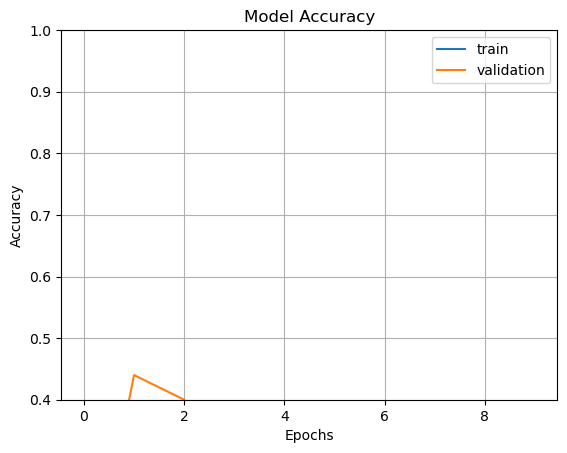

In [ ]:
#Model evaluation:

fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()